# Who Survived the Titanic?

 P2: Investigate a Dataset -- Udacity Data Science Nanodegree
 P6: Data Visualization
 
 Megan O'Neil
 
 2017-03-05

## P2 Introduction

I will be exploring a dataset of demographic and passenger information from 891 of the 2224 passengers and crew on board the Titanic.  One line that often comes to mind from the movie 'Titanic' and depictions of many disaster situations, is "Women and children first!" While always a bit rankled by the inherent sexism in this sentiment, I am curious to see if it played out in the data. Thus I analyze below the difference in survival rates by age and sex. 

Of course, another factor I assume may weigh heavily on survival is socioeconomic status, as worldwide those with less or those who are disempowered tend to be harder hit by disasters of any kind. I take the first, second, and third class distinctions of passengers on the Titanic as proxy for socioeconomic status. I will explore in the case of the Titanic if the status of being in the 'women and children' category weighed more heavily on survival than one's class.

Thus, I will look at the correlation between survival rates and age, sex, and class, visualized through histograms and bar plots. I will also look at the influence of each variable on survival using logistic regression analysis.


## P6 Introduction
This notebook was also used to create datasets for a visualization of titanic passenger survival rates by age group, sex, and class.

## Data Wrangling
 
In the following sets of code, I do the following:
- Import packages needed to import dataset and run analysis
- Import the dataset
- Run initial summary statistics to view the data available and formats


In [1]:
import unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv
from IPython.display import display, HTML
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')
print titanic_df.columns
print titanic_df.count()
print titanic_df.describe()

# Full data for all variables except: Age, Cabin, Embarked
#Non-numeric data are: Name, Sex, Ticket, Cabin, Embarked.

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    

In [3]:
unique_tix = titanic_df.Ticket.unique()
print len(unique_tix)

681


In [4]:
unique_cabins = titanic_df.Cabin.unique()
print len(unique_cabins)

148


In [5]:
print titanic_df.Embarked.unique()

['S' 'C' 'Q' nan]


In [6]:
print titanic_df.Sex.unique()

['male' 'female']


In [7]:
print pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'], rownames = ['Pclass'])

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [8]:
print pd.crosstab(titanic_df['Sex'], titanic_df['Survived'], rownames = ['Sex'])

Survived    0    1
Sex               
female     81  233
male      468  109


## Data Exploration

In the following sections, I will explore the relationship between different variables - focusing on the questions I raised in the introduction - specifically focusing on the following variables:
- Survived: survival (1 = survivor, 0 = non-survivor)
- Pclass: passenger class (1 = first class, 2 = second class, 3 = third class)
- Age: age of passenger, numeric variable
- Sex: sex of passenger (male, female)


In [9]:
titanic_df.corr(method = 'pearson')

#interpreting statistics: http://www.dummies.com/how-to/content/how-to-interpret-a-correlation-coefficient-r.html

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


I initially calculated the Pearson's R to determine a correlation coefficient between each of the numeric variables. As demonstrated in the table above, there are few variables with even a moderate correlation. 

The coefficient is not as useful for investigating the relationship between 'Survived' and other variables, as the former is a binary variable. As such, it is perhaps not as surprising that there is no strong relationship for any of the variables. 

The strongest relationship between any two variables is between passenger class and ticket fare, which is not surprising. However, I would actually expect a stronger relationship; the correlation coefficient is only -0.55. It is negative because 1st class is the most expensive class. The relatively weak relationship indicates that ticket price was likely based on other factors than simply class, perhaps how far in advance the ticket was purchased, or how nice the room was - in which case there was perhaps some diversity of lodging within classes. 

While not placing much weight on the coefficients with 'Survived', the relationship is stronger between passenger class ('Pclass') and 'Survived' (-0.34) than between 'Fare' and 'Survived' (0.26). I will use class as a proxy for passenger status in further analysis of how a passenger's status correlates with survival.


### Exploring Age, Sex, and Class

male      577
female    314
dtype: int64

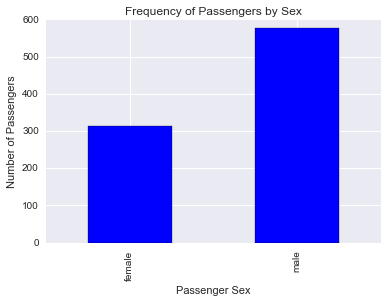

In [10]:
display(pd.value_counts(titanic_df['Sex'].values, sort=False).plot(kind = 'bar'))
plt.title("Frequency of Passengers by Sex")
plt.xlabel("Passenger Sex")
plt.ylabel("Number of Passengers")

display(pd.value_counts(titanic_df['Sex'].values))

This plot demonstrates that far more passengers, at least from our sample, are men (577), than women (314).

3    491
1    216
2    184
dtype: int64

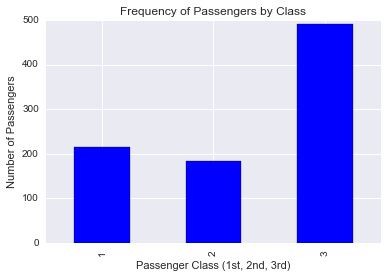

In [11]:
display(pd.value_counts(titanic_df['Pclass'].values, sort=False).plot(kind = 'bar'))
plt.title("Frequency of Passengers by Class")
plt.xlabel("Passenger Class (1st, 2nd, 3rd)")
plt.ylabel("Number of Passengers")

display(pd.value_counts(titanic_df['Pclass'].values))

This plot demonstrates that the vast majority of passengers in our sample are in 3rd class (491), followed by 216 in 1st class, and 184 in 2nd class.

In [12]:
def make_histogram(data, subset, label, color):
    return data[subset].hist(label = label, color = color, alpha = 0.5, bins = binsize)

def age_histogram(total, subplot1, subplot2, binsize, title):
    total
    subplot1
    subplot2
    plt.title(title)
    plt.xlim(0, max(binsize))
    plt.legend()
    plt.ylabel("Number of Passengers")
    plt.xlabel("Age of Passenger")
    plt.show()
    
#Age histograms:
binsize = range(0,90,2)

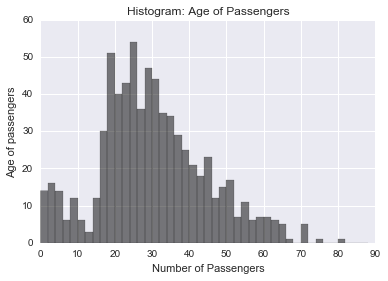

In [13]:
make_histogram(titanic_df, 'Age', 'All Passengers', 'black')
plt.title("Histogram: Age of Passengers")
plt.ylabel("Age of passengers")
plt.xlabel("Number of Passengers")

The histogram of all passenger ages demonstrates a bimodal, positively skewed distribution. The smaller mode is for infants to small children, ages 0-2; the larger mode is for ages 22-24.

##### Survivors and Non-Survivors by Age

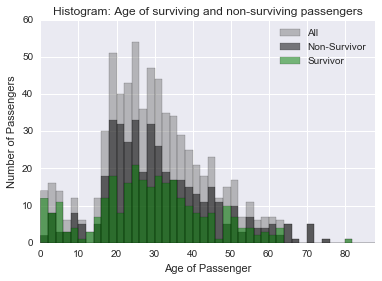

,Survived,Age
0,0,28
1,1,28


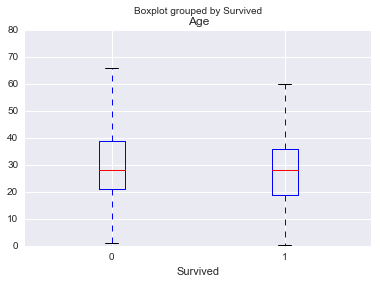

In [14]:
title = "Histogram: Age of surviving and non-surviving passengers"
died = titanic_df[titanic_df['Survived'] == 0]
survived = titanic_df[titanic_df['Survived'] == 1]

total = make_histogram(titanic_df, 'Age', 'All', 'grey')
subplot1 = make_histogram(died, 'Age', 'Non-Survivor', 'black')
subplot2 = make_histogram(survived, 'Age', 'Survivor', 'green')

age_histogram(total, subplot1, subplot2, binsize, title)

titanic_df.boxplot(column = 'Age', by = 'Survived')

grouped = titanic_df.groupby(['Survived'], as_index = False)
display(grouped['Age'].median())

In viewing histograms of the surviving and non-surviving portions of the population, the shape of the distribution is similar for all. The modes of the surviving population are the same as the total population, whereas for the non-surviving population, the modes are slightly shifted. Among children under age 10, a larger proportion of children ages 8-10 died. Among adults in the non-surviving population, the mode is ghigher at ages 30-32, indicating that a larger proportion of these individuals died, compared to the 22-24 age population.

This graph is pertinent to assessing if part of the phrase 'women and children first' was adhered to. The fact that a higher proportion of infants and adults ages 22-24 indicates that it may be that infants and their young parents (perhaps mothers) were prioritized. 

The boxplot and accompanying table interestingly demonstrate that the median age for survivors and non-survivors is the same at 28. However, the interquartile range for non-survivors extends from almost 40 to above 20, compared to a younger range for surivors from around 36 to below 20. Nonetheless, the boxplot demonstrates that there is not much difference in ages between survivors and non-survivors.

Now I want to subset for gender - to assess how the surviving and non-surviving populations differ by gender.

##### Passengers by Gender and Age

The histograms of male and female passengers by age demonstrate that far more men were aboard the titanic than women, though the distribution of ages is similar for both.

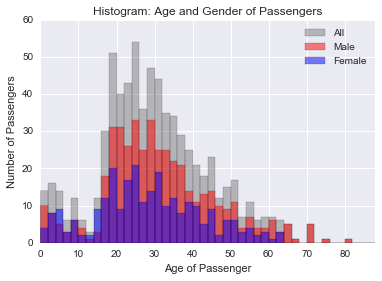

In [15]:
female = titanic_df[titanic_df['Sex'] == 'female']
male = titanic_df[titanic_df['Sex'] == 'male']

title = "Histogram: Age and Gender of Passengers"

total = make_histogram(titanic_df, 'Age', 'All', 'grey')
subplot1 = make_histogram(male, 'Age', 'Male', 'red')
subplot2 = make_histogram(female, 'Age', 'Female', 'blue')

age_histogram(total, subplot1, subplot2, binsize, title)



##### Survivors and Non-survivors by Gender and Age

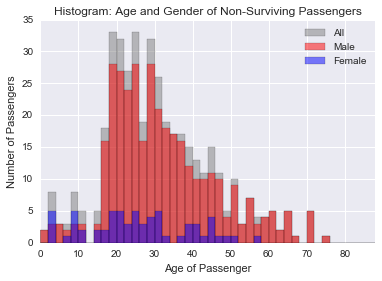

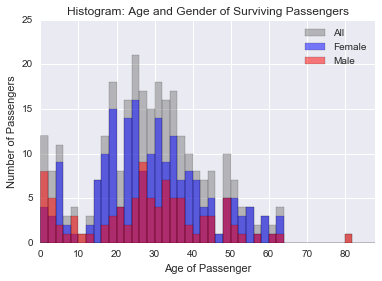

In [16]:
#Non-Survivor Plot
title = "Histogram: Age and Gender of Non-Surviving Passengers"
died = titanic_df[titanic_df['Survived'] == 0]
male_died = died[died['Sex'] == 'male']
female_died = died[died['Sex'] == 'female']

total = make_histogram(died, 'Age', 'All', 'grey')
subplot1 = make_histogram(male_died, 'Age', 'Male', 'red')
subplot2 = make_histogram(female_died, 'Age', 'Female', 'blue')

age_histogram(total, subplot1, subplot2, binsize, title)

#Survivor Plot
title = "Histogram: Age and Gender of Surviving Passengers"
survived = titanic_df[titanic_df['Survived'] == 1]
male_surv = survived[survived['Sex'] == 'male']
female_surv = survived[survived['Sex'] == 'female']

total = make_histogram(survived, 'Age', 'All', 'grey')
subplot1 = make_histogram(female_surv, 'Age', 'Female', 'blue')
subplot2 = make_histogram(male_surv, 'Age', 'Male', 'red')

age_histogram(total, subplot1, subplot2, binsize, title)


Both histograms above demonstrate that (1) very few women did not survive and (2) the majority of survivors were women.The histogram of non-survivors most clearly demonstrates that very few women did not survive. With such a small population, the distribution of non-survivors is approximately uniform for the population. This indicates that regardless of age, women were prioritized for survival. 

The evidence in the lower histogram that the majority of survivors were women is especially notable since we saw above that the majority of passengers were men. 

In [17]:
gender_group = titanic_df.groupby(['Sex'], as_index = False)

survival_gender = gender_group['Survived'].mean()
survival_gender['Count'] = gender_group['Survived'].count()['Survived']

survival_gender


,Sex,Survived,Count
0,female,0.742038,314
1,male,0.188908,577


As demonstrated in the histograms and table above, a much higher percent of women survived than of men, with a survival rate of 74% for women and 19% for men at all age groups. The histograms below present survival of men and women separately. 


##### Males and Females by Survival Status and Age

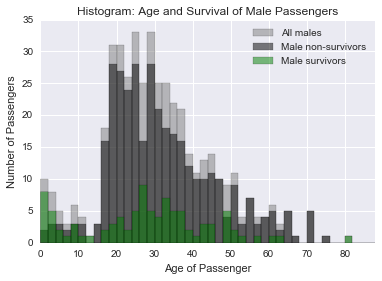

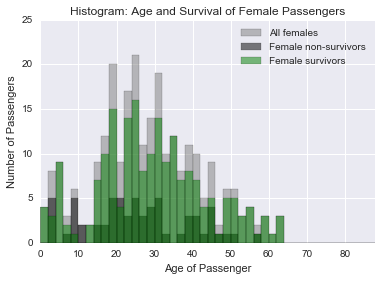

In [18]:
#Male Plot
title = "Histogram: Age and Survival of Male Passengers"
male = titanic_df[titanic_df['Sex'] == 'male']
male_surv = male[male['Survived'] == 1]
male_died = male[male['Survived'] == 0]

total = make_histogram(male, 'Age', 'All males', 'grey')
subplot1 = make_histogram(male_died, 'Age', 'Male non-survivors', 'black')
subplot2 = make_histogram(male_surv, 'Age', 'Male survivors', 'green')

age_histogram(total, subplot1, subplot2, binsize, title)

#Female Plot
title = "Histogram: Age and Survival of Female Passengers"
female = titanic_df[titanic_df['Sex'] == 'female']
female_surv = female[female['Survived'] == 1]
female_died = female[female['Survived'] == 0]

total = make_histogram(female, 'Age', 'All females', 'grey')
subplot1 = make_histogram(female_died, 'Age', 'Female non-survivors', 'black')
subplot2 = make_histogram(female_surv, 'Age', 'Female survivors', 'green')

age_histogram(total, subplot1, subplot2, binsize, title)


The chart for males demonstrates that the majority of males did not survive at nearly all ages, excluding among most age groups of children under 10 and among older age groups. This supports the hypothesis of 'women and children first'.

The chart for females demonstrates that the majority of females survived at nearly all age groups, except for among several age groups of children under 15. This largely supports the hypothesis of 'women and children first'. While it is surprising that the majority of female children died in the 2-4 and 8-10 age range, the sample sizes are so small (8 and 6 respectively) that it is hard to draw much of a conclsuion from this.

##### Passengers by Class and Age

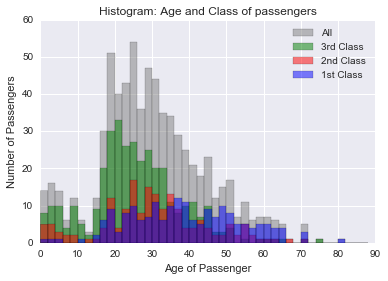

In [19]:
first = titanic_df[titanic_df['Pclass'] == 1]
second = titanic_df[titanic_df['Pclass'] == 2]
third = titanic_df[titanic_df['Pclass'] == 3]

binsize = range(0,90,2)

total = titanic_df['Age'].hist(label = 'All', color = 'grey', alpha = 0.5, bins = binsize)
third_plt = third['Age'].hist(label = '3rd Class', color = 'green', alpha = 0.5, bins = binsize)
second_plt = second['Age'].hist(label = '2nd Class', color = 'r', alpha = 0.5, bins = binsize)
first_plt = first['Age'].hist(label = '1st Class', color = 'b', alpha = 0.5, bins = binsize)

plt.title("Histogram: Age and Class of passengers")
plt.xlim(0,90)
plt.legend()
plt.ylabel("Number of Passengers")
plt.xlabel("Age of Passenger")
plt.show()


This histogram demonstrates that:
- the majority of passengers are in 3rd class, particularly for passengers up to age 35.
- the distribution of ages among third and second class passengers largely reflects that of the overall population, with fewer older passengers.
- the distribution of first class passengers is roughly uniform from ages 18 to 65.

### Assessing Survival Rates by Class, Gender, and Age

In [20]:
# This set of functions was written to create age groups as values.
def next_age_range(age_range,binsize):
    if min(age_range) == 0:
        input = [min(age_range)+binsize+1, max(age_range)+binsize+1, 1]
    else:
        input = [min(age_range)+binsize, max(age_range)+binsize+1, 1]     
    return range(input[0],input[1],input[2])

def create_age_ranges(minimum,maximum,binsize,step):
    age_ranges_list = [range(minimum, binsize + 1, step)]
    while max(age_ranges_list[-1]) < maximum:
        next_range = next_age_range(age_ranges_list[-1],binsize)
        age_ranges_list.append(next_range)
    return age_ranges_list





def set_col_names(age_lists):
    col_names = []
    i = 0
    while i < len(age_lists):
        #Just < not <= because due to python indexing, the first item has an index of 0, 
        #and the last item has an index of 'len(age_lists) -1'
        new_name = str(min(age_lists[i])) + '-' + str(max(age_lists[i]))
        col_names.append(new_name)
        i +=1
    return col_names

def assign_age_group(value):
    #Change values in next line to change age groupings
    age_groups = create_age_ranges(0,80,15,1)
    group_names = set_col_names(age_groups)
    i = 0
    while i < len(age_groups):
        if value in age_groups[i]:
            return group_names[i]
        else:
            i += 1

def reassign_oldest(value):
    if value == '76-90':
        return '61-80'
    if value == '61-75':
        return '61-80'
    else:
        return value

In [21]:
titanic_df['AgeGroup'] = titanic_df['Age'].apply(assign_age_group) 
titanic_df['AgeGroup'] = titanic_df['AgeGroup'].apply(reassign_oldest)

titanic_clean = titanic_df.dropna(subset = ['Pclass', 'Sex', 'AgeGroup','Survived'], how = 'any')
#Dropping all data that doesn't have values for variables I am analyzing.

In [22]:
def plot_summary_1vara(variable, plot_title, x_axis_title):
    grouped = titanic_clean.groupby([variable], as_index = False)
    data = grouped['Survived'].mean()
    data.columns = [variable,'Survived']
    
    data['Count'] = grouped['Survived'].count()['Survived']
    data['Survived'] = data.loc[:,'Survived'] * 100
    cols = [variable, 'Count', 'Survived']
    data = data[cols]
    data.columns = [variable, 'Count', 'Survival Rate (%)']

    display(data)
    
    sns.set_context(rc={"figure.figsize": (8, 4)})
    sns.set_style("whitegrid")
    sns.set_palette(sns.color_palette("Set2", 10))
    
    plot = sns.barplot(x = variable, y = "Survival Rate (%)", data = data)
    plot.set_title(plot_title)
    plot.set(xlabel = x_axis_title, ylabel = 'Survival Rate (%)', ylim = (0,100))

def plot_summary_1var(dataset, variable, plot_title, x_axis_title):
    grouped = dataset.groupby([variable], as_index = False)
    data = grouped['Survived'].mean()
    data.columns = [variable,'Survived']
    
    data['Count'] = grouped['Survived'].count()['Survived']
    data['Survived'] = data.loc[:,'Survived'] * 100
    cols = [variable, 'Count', 'Survived']
    data = data[cols]
    data.columns = [variable, 'Count', 'Survival Rate (%)']

    display(data)
    
    sns.set_context(rc={"figure.figsize": (8, 4)})
    sns.set_style("whitegrid")
    sns.set_palette(sns.color_palette("Set2", 10))
    
    plot = sns.barplot(x = variable, y = "Survival Rate (%)", data = data)
    plot.set_title(plot_title)
    plot.set(xlabel = x_axis_title, ylabel = 'Survival Rate (%)', ylim = (0,100))


In [23]:
grouped1 = titanic_clean.groupby(['Sex'], as_index = False)
dat = grouped1['Survived'].mean()
#dat.columns = ['Sex','Survived']
display(dat)

,Sex,Survived
0,female,0.757812
1,male,0.203233


,Sex,Count,Survival Rate (%)
0,female,256,75.781250
1,male,433,20.323326


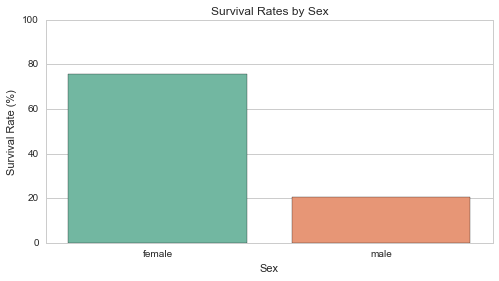

In [24]:
plot_summary_1var(titanic_clean, 'Sex', "Survival Rates by Sex", "Sex")

The above table and chart demonstrate that women had a much higher survival rate than men, at 76% for women and 20% for men.

,AgeGroup,Count,Survival Rate (%)
0,0-15,75,56.000000
1,16-30,321,36.448598
2,31-45,194,43.814433
3,46-60,78,42.307692
4,61-80,21,23.809524


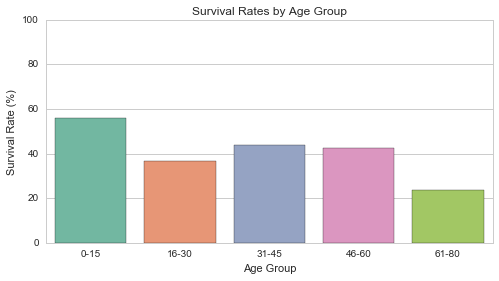

In [25]:
plot_summary_1var(titanic_clean, 'AgeGroup', "Survival Rates by Age Group", "Age Group")

The above table and chart demonstrate that the youngest age group, 0-15 years, had the highest survival rate at 56%. However, the difference is not as distinct between age groups as between sexes.

,Pclass,Count,Survival Rate (%)
0,1,184,65.760870
1,2,167,47.305389
2,3,338,24.260355


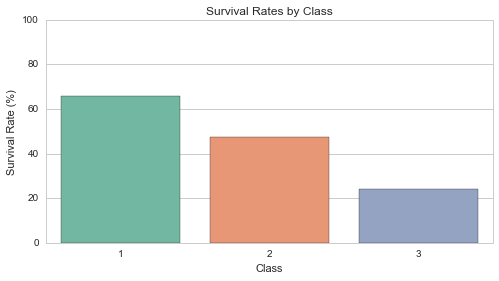

In [26]:
plot_summary_1var(titanic_clean, 'Pclass', "Survival Rates by Class", "Class")

This chart of survival by class demonstrates that those in the first class had the highest survival rate at 63%, then the second class at about 47%, followed by the third class at 24%.

In [27]:
def plot_summary_2var(dataset, var1, var2, plot_title, x_axis_title):
    grouped = dataset.groupby([var1, var2], as_index = False)
    data = grouped['Survived'].mean()
    data['Count'] = grouped['Survived'].count()['Survived']
    data['Survived'] = data.loc[:,'Survived']
    
    cols = [var1, var2, 'Count', 'Survived']
    data = data[cols]
    data.columns = [var1, var2, 'Count', 'Survival Rate (%)']
    data.sort_values([var2])
    #display(data)
    
    sns.set_context(rc={"figure.figsize": (8, 4)})
    sns.set_style("whitegrid")
    sns.set_palette(sns.color_palette("Set2", 10))
    
    plot = sns.barplot(x = var1, y = "Survival Rate (%)", hue = var2, data = data)
    plot.set_title(plot_title)
    plot.set(xlabel = x_axis_title, ylabel = 'Survival Rate (%)')

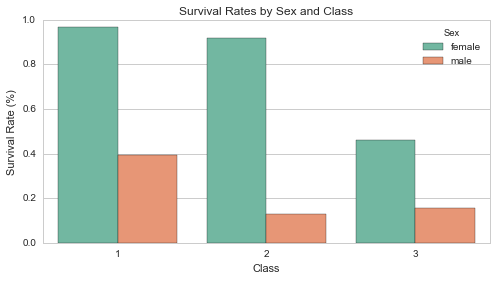

In [28]:
plot_summary_2var(titanic_clean, 'Pclass','Sex', "Survival Rates by Sex and Class", "Class")



The above table and chart demonstrate the survival rates of passengers by class and sex. Among both sexes, the survival rates were higher for women - indicating that women were prioritized despite the class. The difference in survival rate is quite small for women in first and second classes, at 97% and 92% respectively, though only 50% of females in third class survived.

Interestingly, the highest survival rate for males was considerably lower than the lowest for females, at only 37% survival for men in first class. As with females, the rate declined for second class at 16% and third class at 14%. 

It is also interesting to note that for men, the starkest difference is between first and second/third, rather than for females with the starkest difference between third and second/first. I hypothesize that this has something to do with age, so I will assess survival rates by class, gender, and age group.

### Data Visualization Addition
I want to check how powerful my visualization will be if I create what I'm currently picturing:
    - bar chart of survival rate by class, divided by gender.
    - toggle for age group.
    
Formula for creating multiple subplots: http://stackoverflow.com/questions/1358977/how-to-make-several-plots-on-a-single-page-using-matplotlib
for i in range(19):
    plt.subplot(5,4,i+1)

In [29]:
age_groups = titanic_clean.AgeGroup.unique()
age_groups[0]

i = 0
for i in range(0,len(age_groups)):
    print age_groups[i]
    
print "age range: " + age_groups[0]

len(age_groups)

16-30
31-45
46-60
0-15
61-80
age range: 16-30


5

In [30]:
#subset dataset by age
female = titanic_df[titanic_df['Sex'] == 'female']

def charts_by_agegroups(dataset):
    age_groups = dataset.AgeGroup.unique()
    num_charts = len(age_groups)
    for i in range(num_charts):
        plt.subplot(num_charts, 1, i+1)
        for i in range(0, len(age_groups)):
            plot_summary_2var(dataset[dataset['AgeGroup'] == age_groups[i]],
                  'Pclass','Sex', "Survival Rates by Sex and Class: Age "+age_groups[i], "Class")

#charts_by_agegroups(titanic_clean)



['16-30' '31-45' '46-60' '0-15' '61-80']


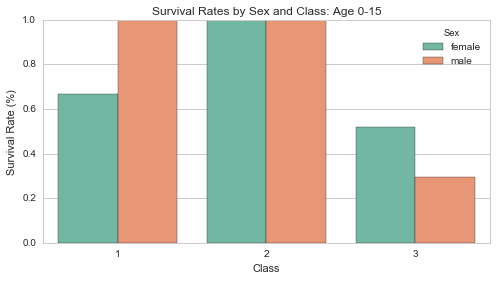

In [31]:
age_groups = titanic_clean.AgeGroup.unique()
print age_groups

age_groups = ['0-15', '16-30', '31-45', '46-60', '61-80']

plot_summary_2var(titanic_clean[titanic_clean['AgeGroup'] == age_groups[0]],
                  'Pclass','Sex', "Survival Rates by Sex and Class: Age "+age_groups[0], "Class")


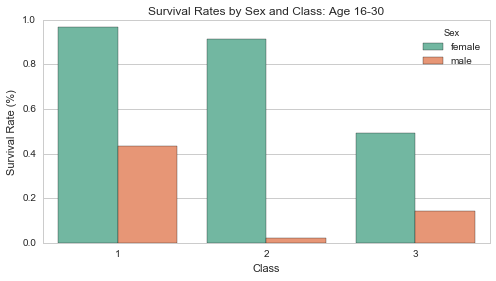

In [32]:
plot_summary_2var(titanic_clean[titanic_clean['AgeGroup'] == age_groups[1]],
                  'Pclass','Sex', "Survival Rates by Sex and Class: Age "+age_groups[1], "Class")

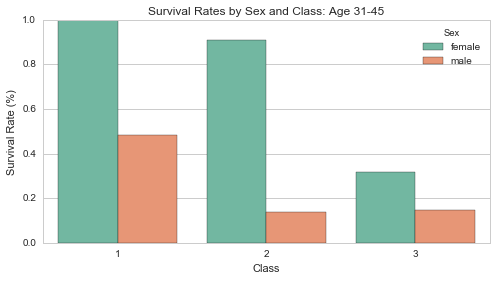

In [33]:
plot_summary_2var(titanic_clean[titanic_clean['AgeGroup'] == age_groups[2]],
                  'Pclass','Sex', "Survival Rates by Sex and Class: Age "+age_groups[2], "Class")

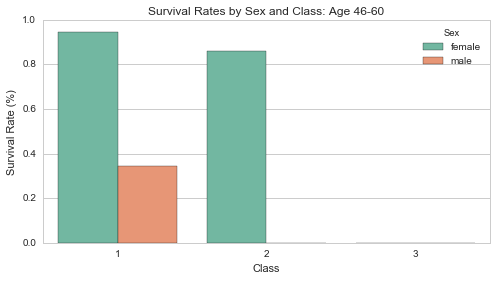

In [34]:
plot_summary_2var(titanic_clean[titanic_clean['AgeGroup'] == age_groups[3]],
                  'Pclass','Sex', "Survival Rates by Sex and Class: Age "+age_groups[3], "Class")

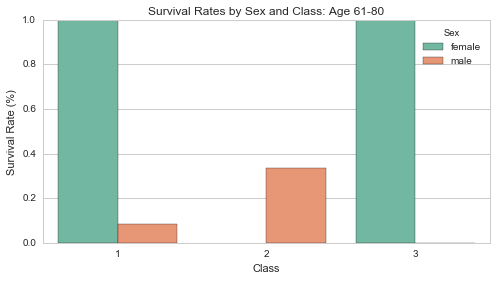

In [35]:
plot_summary_2var(titanic_clean[titanic_clean['AgeGroup'] == age_groups[4]],
                  'Pclass','Sex', "Survival Rates by Sex and Class: Age "+age_groups[4], "Class")

In [36]:
# Format column names & data: make sex capitalized, class with letters
titanic_clean.Sex.replace(to_replace = ["male","female"], value = ["Male","Female"], inplace = True)
titanic_clean.Pclass.replace([1,2,3], ['1st','2nd','3rd'], inplace=True)

C:\Users\ICAR20\Anaconda2\lib\site-packages\pandas\core\generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3rd,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,NaN,S,16-30
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,1,0,PC 17599,71.2833,C85,C,31-45
2,3,1,3rd,"Heikkinen, Miss. Laina",Female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,16-30
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,1,0,113803,53.1000,C123,S,31-45
4,5,0,3rd,"Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,NaN,S,31-45


In [38]:
# Confirm that I'm doing count right - yes, that means all count
M_1st_45 = titanic_clean.loc[(titanic_clean.Sex == 'Male') & (titanic_clean.Pclass == '1st') & 
                            (titanic_clean.AgeGroup == '31-45')]
len(M_1st_45.index)

M_1st_45_surv = M_1st_45.loc[(M_1st_45.Survived == 1)]
len(M_1st_45_surv.index)

float(len(M_1st_45_surv.index))/len(M_1st_45.index)

0.48484848484848486

In [85]:
grouped = titanic_clean.groupby(['Pclass', 'Sex', 'AgeGroup'], as_index = False)
survival_byage = grouped['Survived'].mean()
survival_byage['Total'] = grouped['Survived'].count()['Survived']
survival_byage['NSurv'] = survival_byage.loc[:,'Total'] * (survival_byage.loc[:,'Survived'] )
survival_byage = survival_byage.round({'Survived': 2, 'NSurv':0})
survival_byage

grouped = titanic_clean.groupby(['Pclass', 'Sex'], as_index = False)
survival_all = grouped['Survived'].mean()
survival_all['Total'] = grouped['Survived'].count()['Survived']
survival_all['NSurv'] = survival_all.loc[:,'Total'] * (survival_all.loc[:,'Survived'] )
survival_all = survival_all.round({'Survived': 2, 'NSurv':0})
survival_all

grouped = titanic_clean.groupby(['Pclass'], as_index = False)
survival_simp = grouped['Survived'].mean()
survival_simp['Survived'] = survival_simp.loc[:,'Survived']
survival_simp = survival_simp.round({'Survived': 2})
#survival_simp

grouped = titanic_clean.groupby(['Sex','AgeGroup'], as_index = False)
survival_allclass = grouped['Survived'].mean()
survival_allclass['Total'] = grouped['Survived'].count()['Survived']
survival_allclass['NSurv'] = survival_allclass.loc[:,'Total'] * (survival_allclass.loc[:,'Survived'] )
survival_allclass = survival_allclass.round({'Survived': 2, 'NSurv':0})
survival_allclass

,Pclass,Sex,Survived,Total,NSurv
0,1st,Female,0.96,85,82
1,1st,Male,0.39,99,39
2,2nd,Female,0.92,73,67
3,2nd,Male,0.13,94,12
4,3rd,Female,0.46,98,45
5,3rd,Male,0.15,240,37


In [40]:
# Write this dataframe to a CSV
# ref: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

survival_all.to_csv('survival_all.csv')
survival_byage.to_csv('survival_byage.csv')
survival_simp.to_csv('survival_simp.csv')

In [55]:
# Make a 'wide tidy' dataset for visualizing
# ref: http://chrisalbon.com/python/pandas_long_to_wide.html
surv_class_sex = survival_all.pivot(index='Pclass', columns='Sex', values='Survived')
#surv_class_sex

In [58]:
# Add 'All' Age group to survival_by_age
survival_all['AgeGroup']='All'
survival_byage_all = survival_byage.append(survival_all, ignore_index=True)

cols = ['AgeGroup','Pclass','Sex','Survived','NSurv','Total']
survival_byage_all = survival_byage_all[cols]
survival_byage_all.sort_values(['AgeGroup','Pclass','Sex'])
survival_byage_all = survival_byage_all.reset_index(drop = True)

survival_byage_all['NDied'] = survival_byage_all.Total - survival_byage_all.NSurv
survival_byage_all['Died'] = 1 - survival_byage_all.Survived
#survival_byage_all

#survival_byage_all.to_csv('survival_byage_all.csv')

In [60]:
# ref: http://stackoverflow.com/questions/28225465/multi-index-pivoting-in-pandas
surv_age_class_sex = survival_byage_all.pivot_table(index = ['AgeGroup','Pclass'], columns = 'Sex', values = 'Survived')
#surv_age_class_sex

#surv_age_class_sex.to_csv('surv_age_class_sex.csv')

In [97]:
#Create widest table: agegroup, class, f-surv%, m-surv%, f-died%, m-surv%,f-Nsurv, m-Nsurv, f-Ndied, m-Ndied
# Ref: http://stackoverflow.com/questions/33290374/pandas-pivot-table-column-names
titanic_wide = survival_byage_all.pivot_table(index = ['AgeGroup','Pclass'], columns = 'Sex', 
                                                    values = ['Survived','Died','NSurv','NDied','Total'])

titanic_wide.columns = [str(s2) + '.' + s1 for (s1,s2) in titanic_wide.columns.tolist()]
titanic_wide.index.name = None
#titanic_wide = titanic_wide.rename(columns = {'Female.Survived': 'Female Survivived', 'Female.Died':'Female Died', 
     #                'Male.Survived': 'Male Survived','Male.Died': 'Male Died'})
titanic_wide
titanic_wide.to_csv('titanic_wide.csv')

In [90]:
# Add 'All' Class group to survival_byage
survival_allclass['Pclass']='All'
survival_byclass_all = survival_byage.append(survival_allclass, ignore_index=True)

cols = ['AgeGroup','Pclass','Sex','Survived','NSurv','Total']
survival_byclass_all = survival_byclass_all[cols]
survival_byclass_all.sort_values(['AgeGroup','Pclass','Sex'])
survival_byclass_all = survival_byclass_all.reset_index(drop = True)

survival_byclass_all['NDied'] = survival_byclass_all.Total - survival_byage_all.NSurv
survival_byclass_all['Died'] = 1 - survival_byclass_all.Survived
#survival_byclass_all

#survival_byage_all.to_csv('survival_byage_all.csv')

In [100]:
# Create wide dataset so I can create class buttons instead of age buttons!
#Create widest table: agegroup, class, f-surv%, m-surv%, f-died%, m-surv%,f-Nsurv, m-Nsurv, f-Ndied, m-Ndied
# Ref: http://stackoverflow.com/questions/33290374/pandas-pivot-table-column-names
titanic_class_wide = survival_byclass_all.pivot_table(index = ['Pclass', 'AgeGroup'], columns = 'Sex', 
                                                    values = ['Survived','Died','NSurv','NDied','Total'])

titanic_class_wide.columns = [' '.join(col).strip() for col in titanic_class_wide.columns.values]
titanic_class_wide.index.name = None

titanic_class_wide
titanic_class_wide.to_csv('titanic_class_wide.csv')

## Back to original Titanic Analysis

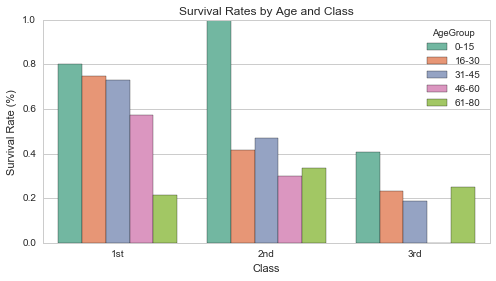

In [47]:
plot_summary_2var(titanic_clean, 'Pclass','AgeGroup', "Survival Rates by Age and Class", "Class")

The above table and chart demonstrates the survival rates of passengers by class and age group. In all classes, the survival rate is highest for the youngest group, ages 0-15, though this distinction is most noticeable in the second class, where 100% of the passengers survived. The sample size is relatively small for this age group in 1st class (N = 5) and in 2nd class (N = 16). 

As expected, apart from the 0-15 group for the 2nd class, the survival rates of each age group is lower as the class moves down. In the 3rd class, the youngest group also had a noticeably higher survival rate at over 40%, compared to the other age groups around 20%, except for the 46-60 year old age group, of which 0% survived.

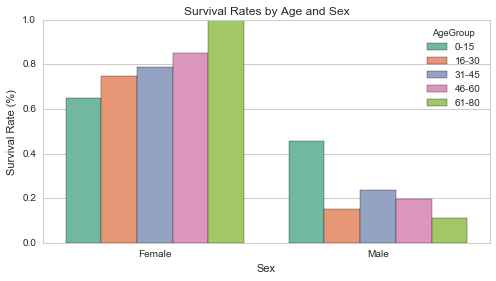

In [48]:
plot_summary_2var(titanic_clean, 'Sex','AgeGroup', "Survival Rates by Age and Sex", "Sex")

The above table and chart demonstrate the survival rates of passengers by sex and age group. As expected from the histograms, the survival rate for women is higher in all age groups than for any age groups of men. 

Interstingly, for women, survival rates increased almost linearly as the age group increased, with a survival rate of 65% for ages 0-15, up to 100% for the eldest age group of 61-80. Thus we confirm that women were prioritized over men, but female children were not priotized.

Among males, children age 0-15 were clearly prioritized over all other age groups, with a survival rate of over 46% compared to 11-23% for hte rest of the age categories. Among males, the eldest fared worst.

## Regression Analysis - Sex, Age, and Class on Survival

In [49]:
import statsmodels.api as sm
import pylab as pl

df = pd.read_csv("titanic_data.csv")
#1. Dummify the class variable.
dummy_class = pd.get_dummies(titanic_df['Pclass'], prefix='class')

#2. Dummify the sex variable
dummy_sex = pd.get_dummies(titanic_df['Sex'], prefix='sex')

#3. Create dataframe with only columns you want to include; class 3 is our baseline.
cols_to_keep = ['Survived','Age']
data = titanic_df[cols_to_keep].join(dummy_class.ix[:, :'class_2'])
data = data.join(dummy_sex.ix[:, :'sex_female'])

#4. Manually add intercept, required for statsmodel
data['intercept'] = 1.0

#5. Index([Age, class1, class2, sex_female], dtype=object)
train_cols = data.columns[1:]

#6. Remove any invalid data
data = data.dropna()

#7. Run logistic regression
logit = sm.Logit(data['Survived'], data[train_cols])
result = logit.fit()

print result.summary()

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Sun, 05 Mar 2017   Pseudo R-squ.:                  0.3289
Time:                        16:04:04   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 2.074e-67
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Age           -0.0370      0.008     -4.831      0.000        -0.052    -0.022
class_1        2.5806      0.

I ran a logistic regression model to determine the effect of age, class, and sex on survival. I used a logistic regression because survival is a binary variable, where 1 = survived and 0 = did not survive. 

As demonstrated above, all coefficients were statistically significant at alpha level of 0.01. As this is a logistic regression, we cannot intrepret the magnitude of the coefficients as simply as with a linear regression, however the sign is indicative of hte direction of the relationship. In all cases, the sign is as predicted:
- Negative coefficient for age confirms that as age increases, survival is less likely.
- Positive coeffieicnt for class 1 and class 2 confirms that in comparison with passengers in class 3 (the excluded dummy variable for class), survival is more likely for passengers in class 1 and class 2.
- Positive coefficient for sex_female confirms that if a passenger is female, she is more likely to survive than if she were male.

However, it is also important to note that if the confidence interval contains the value 1, the variable does not have any real impact on odds. 


odds ratio for a variable in logistic regression represents how the odds change with a 1 unit increase n that variable, holding all other variables constant.

33% of deviance in surival can be explained by age, class, and sex.

If confidence interval contains 1, or 1.00, variable does nto have any real impact on odds.


odds are probabiliy of event, divided by probability of event not happening.

In [50]:
# Odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OddsRatio'] = params
conf.columns = ['OddsRatio', '2.5%', '97.5%']
print np.exp(conf)


            OddsRatio       2.5%      97.5%
Age          0.949338   0.978260   0.963690
class_1      7.606545  22.925310  13.205393
class_2      2.208916   5.749716   3.563795
sex_female   8.300387  18.713771  12.463208
intercept    0.163286   0.431480   0.265433


In a logistic regression, the dependent variable is equal to the log of the odds of the event occurring, which is equal to p/(1-p). In order to interpret the coefficients we have to take the exponential of each value, which gives the percent change in odds of survival due to a one unit increase in the variable, for age, or the presence of a variable in case of dummy values, including class and sex, holding all other variables constant. The odds ratios listed above demonstrate the following.
- For a one-year increase in Age, the odds of surviving decrease by 5% (0.949-1). 
- If a passenger is in 1st class instead of 3rd class (the omitted dummy variable), the odds of survival increase by 661%.
- If a passenger is in 2nd class instead of 3rd class, the odds of survival increase by 121%.
- If a passenger is female rather than male, the odds of survival increase by 730%.

This demonstrates the impact of each variable on its own. As evidenced by the logistic regression results, the factor that weighs most heavily on likelihood of survival is sex, with females being far more likely to survive than males. The second most important factor is class - where 1st class has highest odds of survival, followed by 2nd, then 3rd. Finally, age has the least effect, with the likelihood of survival decreasing slightly as a passenger ages.

## Conclusion

As demonstrated, age, sex, and class all have a statistically significant relationship with passenger survival. 

My first question is if women and children were indeed prioritized for saving. The fact that women of all classes and ages had higher survival rates than men clearly demonstrates that women were indeed prioritized. The logistic regression results demonstrate that of the variables, sex had the most effect on survival rate.

Children were also prioritized, though the distinction in survival rates across age groups was not as distinct. However, among all males, children were clearly prioritized over every other age group. This did not hold for females, among whom children had the lowest survival rate, indicating that sex is likely a stronger predictor of survival than age. The logistic regression analysis demonstrated that looking solely at age, the younger a passenger, the higher their likelihood of survival.

I also looked at passenger class, to see how well 'women and children first' was upheld despite socio-economic status. When viewing classes as a whole, unsurprisingly survival was highest for 1st class, followed by 2nd class, then 3rd class. Within each class, females had demonstrably higher survival rates than males. Also within each class, children had the highest survival rate of any other age group in the same class. The logistic regression analysis demonstrated that class was important, with survival likelihood decreasing for passengers in lower classes.

It is also important to recognize the limitations of the data, which only includes information on 891 of over 2000 passengers onboard the Titanic. It is not clear why information is available on this specific sample of passengers, thus the sample may be biased and not representative of the rest of the ship. 

There was also incomplete data for this sample for Age, with data for only 714 of the 891 passengers in the sample. In my analysis of survival rates by age, sex, and class, I dropped all data for passengers for whom age was unknown. Once again, if age data was known for certain passengers, dropping the passengers for whom this data was unknown may further bias our sample, making extrapolation of these results to the broader Titanic population more tenuous.

Nonetheless, we can draw interesting conclusions from the sample we have on the likelihood of survival based on sex, age, and class.



## References:

- Logistic regressions using python, statsmodel package, and pylab: http://blog.yhat.com/posts/logistic-regression-and-python.html
- Odds ratio interpretation resource: http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm
- Interpreting logistic regressions: https://www.youtube.com/watch?v=eX2sY2La4Ew, https://www.youtube.com/watch?v=ckkiG-SDuV8
